In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [25]:
data=pd.read_csv("credit_card_fraud_dataset.csv")
data.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [27]:
print(data.columns)

Index(['TransactionID', 'TransactionDate', 'Amount', 'MerchantID',
       'TransactionType', 'Location', 'IsFraud'],
      dtype='object')


In [29]:
data["TransactionDate"] = pd.to_datetime(data["TransactionDate"])
data["Year"] = data["TransactionDate"].dt.year
data["Month"] = data["TransactionDate"].dt.month
data["Day"] = data["TransactionDate"].dt.day
data.drop(columns=["TransactionID", "TransactionDate"], inplace=True)

In [31]:
X = data.drop(columns=["IsFraud"])
y = data["IsFraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ["Amount", "Year", "Month", "Day"]
categorical_features = ["MerchantID", "TransactionType", "Location"]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [33]:
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     19787
           1       0.00      0.00      0.00       213

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.98     20000



In [34]:
model = pipeline.named_steps['classifier']
feature_names = numeric_features + list(pipeline.named_steps['preprocessing'].named_transformers_['cat'].get_feature_names_out())

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[-10:]  

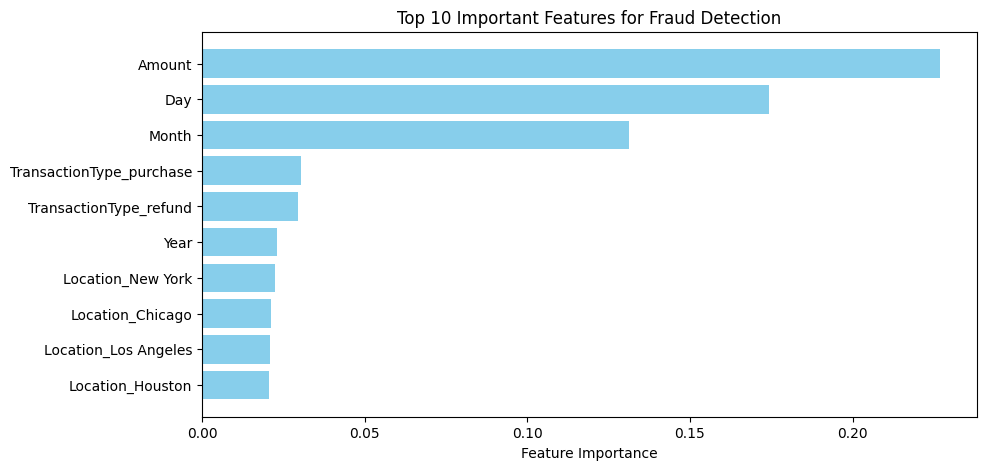

In [37]:
plt.figure(figsize=(10, 5))
plt.barh(np.array(feature_names)[sorted_idx], feature_importance[sorted_idx], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features for Fraud Detection")
plt.show()  